In [1]:
#import of subprograms

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from __plt__2 import *

In [2]:
#inputting database
path = r'E:/databases/Merged.csv'
usecols = ['ager_percentile50', 'T_C_ISM_percentile50', 'T_C_ISM_percentile84', 'T_C_ISM_percentile16', 'T_W_BC_percentile50', 'T_W_BC_percentile84', 'T_W_BC_percentile16', 'P100_flux', 'P100_fluxerr', 'BPT', 'WHAN', 'Z_1', 'SFR_0_1Gyr_percentile50', 'SFR_0_1Gyr_percentile84', 'SFR_0_1Gyr_percentile16', 'mass_stellar_percentile50', 'SurfaceDensity', 'SurfaceDensityErr', 'SurfaceDensityFlag', 'LOIII', 'LOIII_er', 'SURVEY_x']
MainDataFrame = pd.read_csv(path, usecols=usecols)

In [3]:
#bids setting
bids_age = [[0.0, 8.8], [8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_age_plt = [[8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_mass = [[0.0, 10.0], [10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]
bids_mass_plt = [[10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]
bids_z = [[0.0, 0.05], [0.05, 0.1], [0.1, 0.15], [0.15, 0.2], [0.2, 0.25], [0.25, 0.3], [0.3, 0.34]]

In [4]:
# MainDataFrame.replace('""', -999.0, inplace=True)
# MainDataFrame['SurfaceDensity'] = pd.to_numeric(MainDataFrame['SurfaceDensity'])
# MainDataFrame['SurfaceDensityErr'] = pd.to_numeric(MainDataFrame['SurfaceDensityErr'])
# MainDataFrame['SurfaceDensityFlag'] = pd.to_numeric(MainDataFrame['SurfaceDensityFlag'])
# MainDataFrame.to_csv('main.csv')

# db = MainDataFrame

# db = db[db['SurfaceDensity'] > 0]
# db = db[db['SurfaceDensityErr'] > 0]
# db = db[db['SurfaceDensity'] > 2*db['SurfaceDensityErr']]
# db['SurfaceDensity'] = np.log10(db['SurfaceDensity'])
# UP = np.log10(db['SurfaceDensity'] + db['SurfaceDensityErr'])
# print(UP)
# db['SurfaceDensityUp'] = UP
# DOWN = np.log10(db['SurfaceDensity'] - db['SurfaceDensityErr'])
# db['SurfaceDensityDown'] = DOWN

# print(db['SurfaceDensity'])
# print(db['SurfaceDensityUp'])
# print(db['SurfaceDensityDown'])

    SURVEY_x    BPT  WHAN      LOIII   LOIII_er     Z_1  \
0       SDSS   AGNX   LLR  38.251361  -2.000000  0.0550   
1       SDSS   AGNX   LLR  39.803851  -1.000000  0.0552   
2       SDSS  UNCXY  sAGN  41.121789  39.658083  0.0933   
3       SDSS   UNCX   ELR  39.825951  -2.000000  0.0883   
4       SDSS  AGNXY  wAGN  40.118062  39.547827  0.0854   
..       ...    ...   ...        ...        ...     ...   
640     GAMA   SFGX  sAGN  40.142624  -2.000000  0.1836   
641     GAMA   SFGX  sAGN  40.387005  -2.000000  0.1520   
642     GAMA   SFGX   SFG  40.146706  -2.000000  0.1248   
643     GAMA   UNCX   NER  40.726558  -2.000000  0.2800   
644     GAMA  UNCXY  sAGN  40.336067  -2.000000  0.1379   

     mass_stellar_percentile50  T_C_ISM_percentile16  T_C_ISM_percentile50  \
0                       10.410                17.888                21.063   
1                       10.820                21.988                23.388   
2                       10.880                22.963     

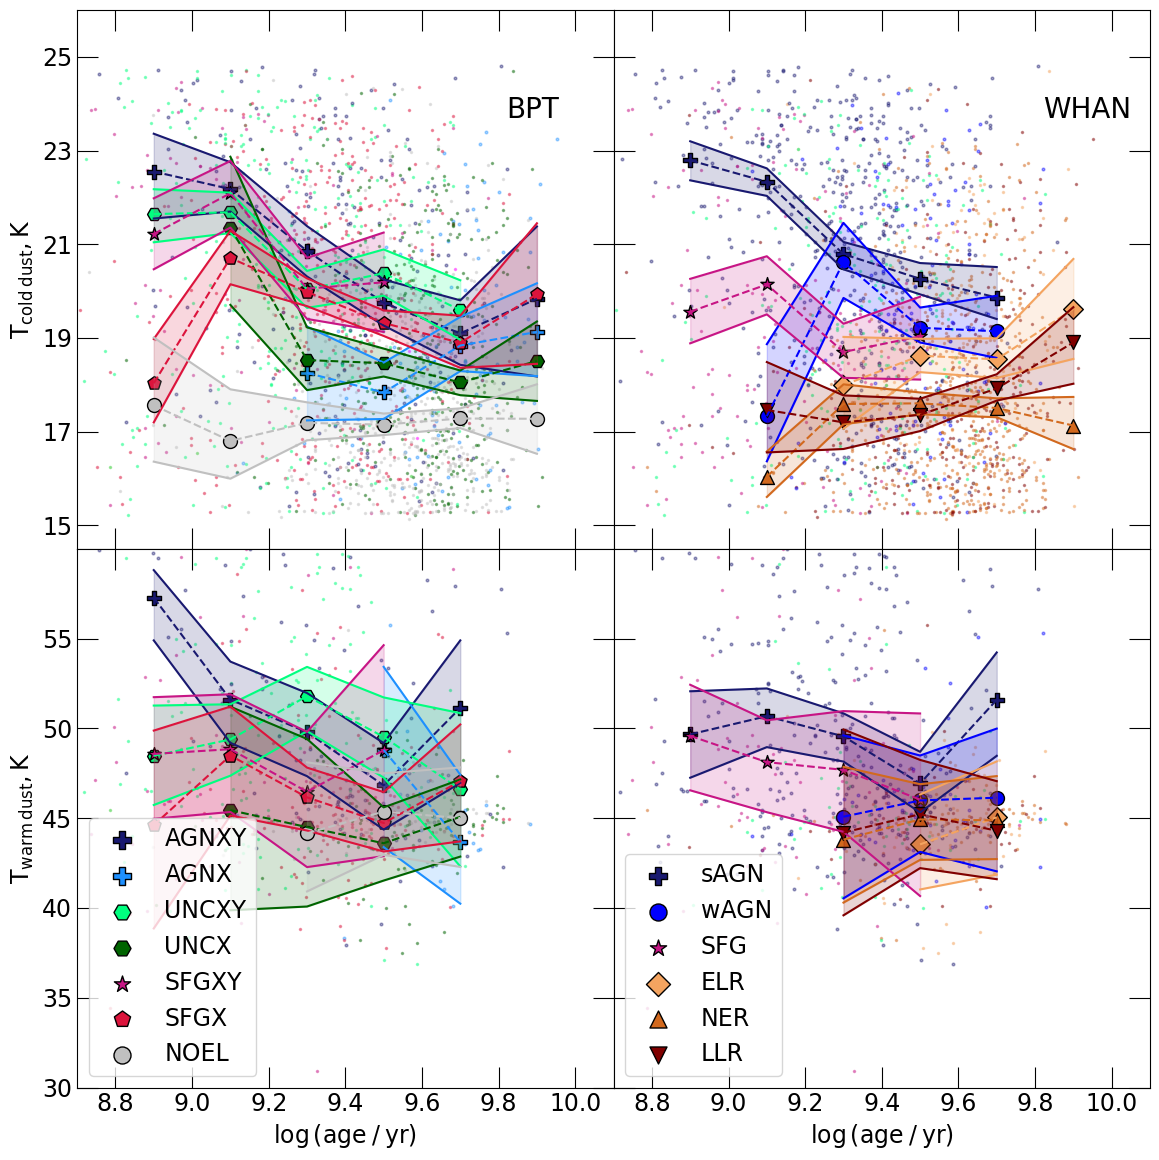

In [5]:
db = MainDataFrame

#setting up figure and its shape
gs_top = plt.GridSpec(2, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 12), tight_layout=True)
adjusting_plotting_pars()

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs_top[1,0])
ax4 = fig.add_subplot(gs_top[1,1], sharey=ax3)

#creating basic plotting pars
pars_dict_1 ={
    'db' : db,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'ager_percentile50',
    'y' : 'T_C_ISM_percentile50',
    'up' : 'T_C_ISM_percentile84',
    'down' : 'T_C_ISM_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [14.5, 26],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(15, 25.9, 2),
    'xlabel' : False,
    'ylabel' : r'$\mathrm{T_{cold \: dust}, K}$',
    'bids': bids_age_plt,
    'annotation' : True,
    'legend' : False
}

db2 = db[db['P100_flux'] > 2*db['P100_fluxerr']]
db2 = db2[db2['P100_flux'] > 0]
db2.reset_index(inplace=True, drop=True)
print(db2)
print(db2.shape)

pars_dict_2 = {
    'db' : db2,
    'ax1' : ax3,
    'ax2' : ax4,
    'x' : 'ager_percentile50',
    'y' : 'T_W_BC_percentile50',
    'up' : 'T_W_BC_percentile84',
    'down' : 'T_W_BC_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [30, 60],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(30, 60, 5),
    'xlabel' : r'$\log \mathrm{(age \: / \: yr)}$',
    'ylabel' : r'$\mathrm{T_{warm \: dust}, K}$',
    'bids': bids_age_plt,
    'annotation' : False,
    'legend' : True
}

#initialzing of plotting
ax1, ax2 = plotting(pars_dict_1)
ax3, ax4 = plotting(pars_dict_2)

#additional plotting stuff
fig.savefig('TDC.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)
#displaying and saving the figure 

In [6]:
db = MainDataFrame

print(db.shape)
db2 = db[db['ager_percentile50'] < 8.7]
print(db2.shape)


(1995, 22)
(30, 22)


(372, 22)
(893, 22)
(730, 22)


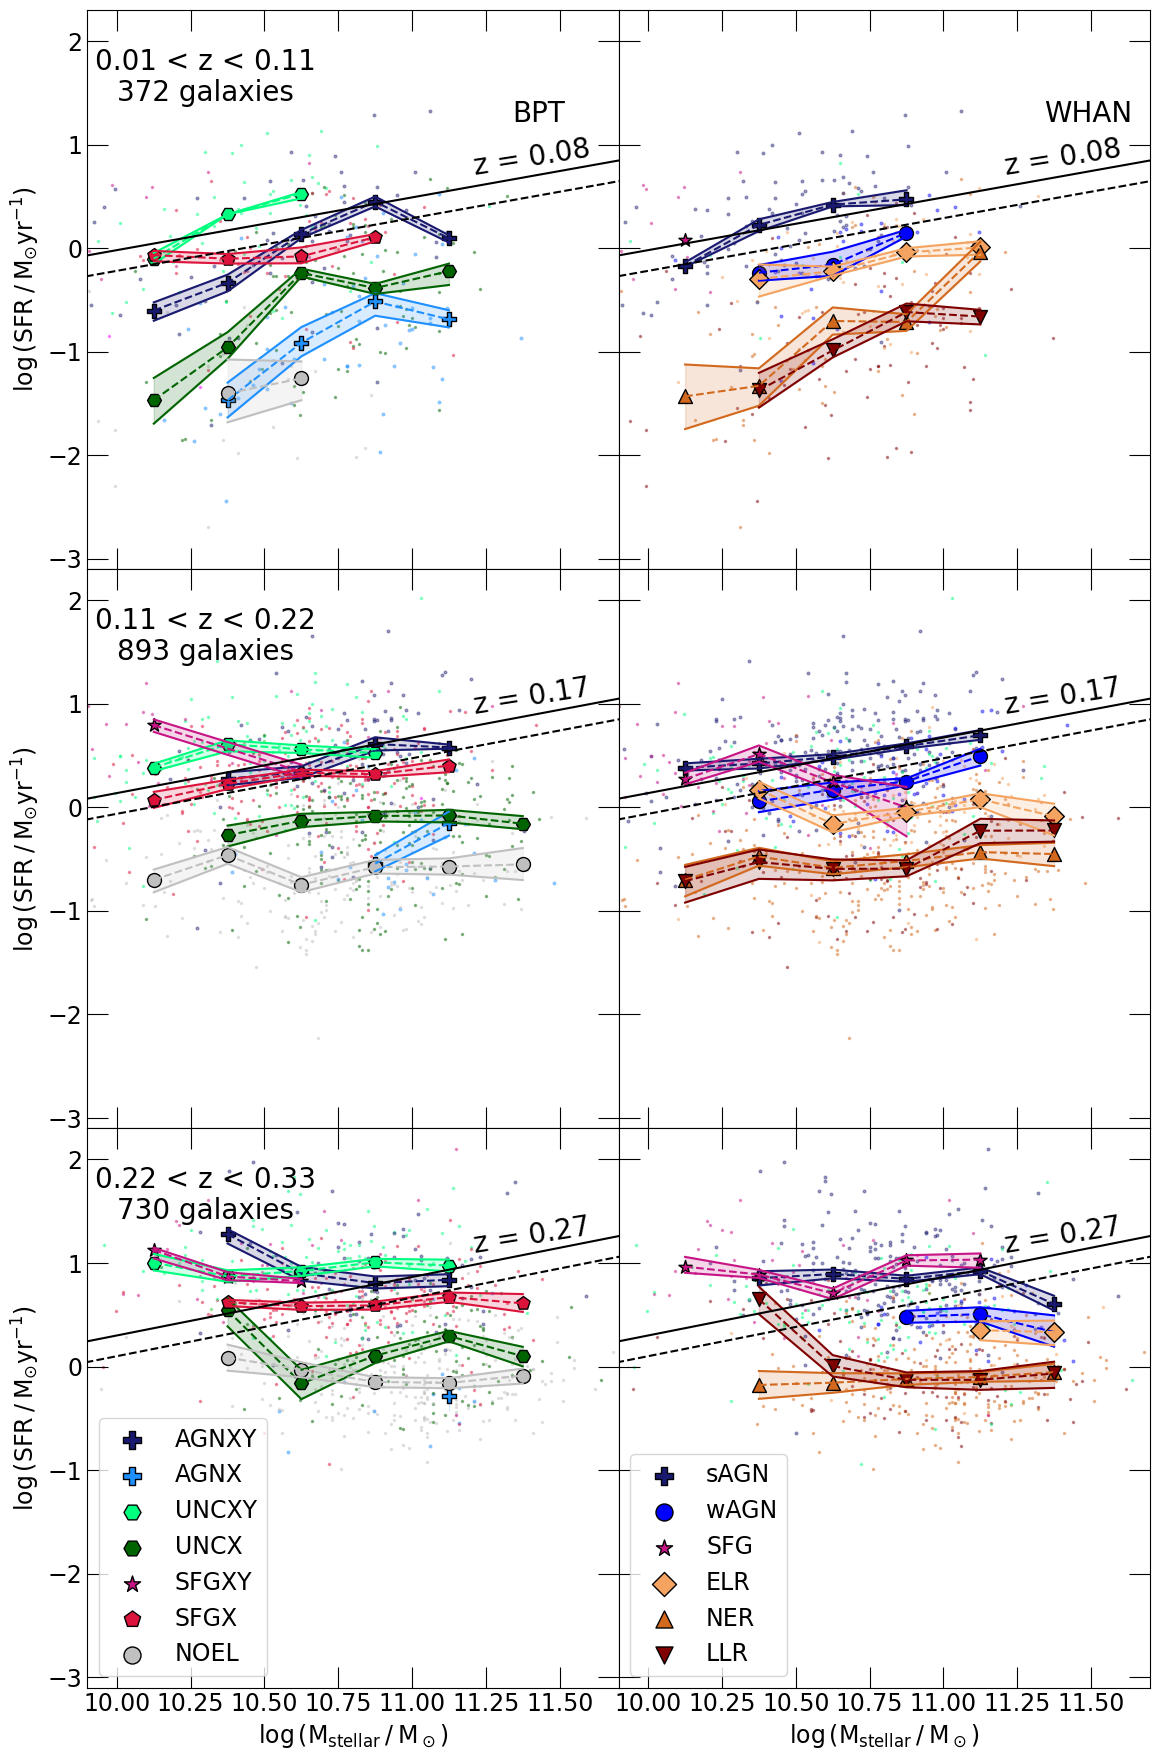

In [7]:
#applying some conditions for db
from astropy.cosmology import WMAP9 as cosmo

db = MainDataFrame

#setting up figure and its shape
gs_top = plt.GridSpec(3, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 18), tight_layout=True)
adjusting_plotting_pars()

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs_top[1,0])
ax4 = fig.add_subplot(gs_top[1,1], sharey=ax3)
ax5 = fig.add_subplot(gs_top[2,0])
ax6 = fig.add_subplot(gs_top[2,1], sharey=ax5)

#creating basic plotting pars

db1 = db[db['Z_1'] <= 0.11]
db1 = db1[db1['Z_1'] > 0.01]
db1.reset_index(inplace=True, drop=True)
median1 = np.median(db1['Z_1'])
print(db1.shape)

pars_dict_1 ={
    'db' : db1,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.7],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.7, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : False,
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : True,
    'legend' : False
}

db2 = db[db['Z_1'] <= 0.22]
db2 = db2[db2['Z_1'] > 0.11]
db2.reset_index(inplace=True, drop=True)
median2 = np.median(db2['Z_1'])
print(db2.shape)

pars_dict_2 ={
    'db' : db2,
    'ax1' : ax3,
    'ax2' : ax4,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.7],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.7, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : False,
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : False,
    'legend' : False
}

db3 = db[db['Z_1'] <= 0.33]
db3 = db3[db3['Z_1'] > 0.22]
db3.reset_index(inplace=True, drop=True)
median3 = np.median(db3['Z_1'])
print(db3.shape)

pars_dict_3 ={
    'db' : db3,
    'ax1' : ax5,
    'ax2' : ax6,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.7],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.7, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : r'$\log \mathrm{(M_{stellar} \: / \: M_\odot)}$',
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : False,
    'legend' : True
}

#initialzing of plotting
ax1, ax2 = plotting(pars_dict_1)
ax3, ax4 = plotting(pars_dict_2)
ax5, ax6 = plotting(pars_dict_3)

x = np.arange(6.9, 12, 0.1)
ax1.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value), color='k', linestyle='solid')
ax1.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value) - 0.2, color='k', linestyle='dashed')
ax1.text(11.2, (0.84 - 0.026*cosmo.age(median1).value)*11.4 - (6.5 - 0.11*cosmo.age(median1).value), f'z = {round(median1, 2)}', rotation=9)
ax1.text(10.3, 1.8, '0.01 < z < 0.11', ha='center', va='center')
ax1.text(10.3, 1.5, '372 galaxies', ha='center', va='center')
ax2.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value), color='k', linestyle='solid')
ax2.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value) - 0.2, color='k', linestyle='dashed')
ax2.text(11.2, (0.84 - 0.026*cosmo.age(median1).value)*11.4 - (6.5 - 0.11*cosmo.age(median1).value), f'z = {round(median1, 2)}', rotation=9)

ax3.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value), color='k', linestyle='solid')
ax3.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value) - 0.2, color='k', linestyle='dashed')
ax3.text(11.2, (0.84 - 0.026*cosmo.age(median2).value)*11.4 - (6.5 - 0.11*cosmo.age(median2).value), f'z = {round(median2, 2)}', rotation=9)
ax3.text(10.3, 1.8, '0.11 < z < 0.22', ha='center', va='center')
ax3.text(10.3, 1.5, '893 galaxies', ha='center', va='center')
ax4.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value), color='k', linestyle='solid')
ax4.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value) - 0.2, color='k', linestyle='dashed')
ax4.text(11.2, (0.84 - 0.026*cosmo.age(median2).value)*11.4 - (6.5 - 0.11*cosmo.age(median2).value), f'z = {round(median2, 2)}', rotation=9)

ax5.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value), color='k', linestyle='solid')
ax5.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value) - 0.2, color='k', linestyle='dashed')
ax5.text(11.2, (0.84 - 0.026*cosmo.age(median3).value)*11.4 - (6.5 - 0.11*cosmo.age(median3).value), f'z = {round(median3, 2)}', rotation=9)
ax5.text(10.3, 1.8, '0.22 < z < 0.33', ha='center', va='center')
ax5.text(10.3, 1.5, '730 galaxies', ha='center', va='center')
ax6.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value), color='k', linestyle='solid')
ax6.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value) - 0.2, color='k', linestyle='dashed')
ax6.text(11.2, (0.84 - 0.026*cosmo.age(median3).value)*11.4 - (6.5 - 0.11*cosmo.age(median3).value), f'z = {round(median3, 2)}', rotation=9)


#additional plotting stuff
fig.savefig('SFRSM.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)
#displaying and saving the figure 

e:\backup\backup_BPT\current\__plt__2.py:324: DtypeWarning: Columns (0,224,227,228,253,267,273,277,288,302,306,323,339,340,358,372,374,413,432,434,450,451,483,504,615,667,699,711,744,752,753,754,755,756,758,804,833,901,933,951,956,1013,1014,1020,1021) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(pars_dict['input_path'])


AGN [0, 0, 5, 21, 39, 20, 5] 90
AGNX [0, 0, 2, 7, 16, 50, 17] 92
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [1, 4, 7, 10, 28, 12, 0] 62
UNCX [0, 0, 5, 21, 113, 179, 23] 341
UNCY [1, 0, 0, 0, 1, 0, 0] 2
SFGXY [0, 1, 0, 3, 6, 1, 0] 11
SFGX [1, 3, 13, 56, 109, 36, 5] 223
SFGY [0, 0, 0, 0, 2, 1, 0] 3
NOEL [1, 2, 4, 50, 185, 215, 17] 474
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [4, 10, 36, 168, 499, 514, 67] 1298


AGN [4, 13, 26, 40, 24, 7, 0] 114
AGNX [0, 0, 0, 2, 4, 0, 0] 6
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [12, 32, 60, 79, 31, 4, 0] 218
UNCX [0, 3, 2, 11, 24, 2, 0] 42
UNCY [0, 0, 2, 1, 0, 0, 0] 3
SFGXY [14, 23, 20, 21, 6, 2, 0] 86
SFGX [9, 12, 33, 96, 53, 3, 0] 206
SFGY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [2, 2, 2, 9, 6, 1, 0] 22
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [41, 85, 145, 259, 148, 19, 0] 697


AGN [4, 13, 31, 61, 63, 27, 5] 204
AGNX [0, 0, 2, 9, 20, 50, 17] 98
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [13, 36, 67, 89, 59, 16, 0] 280
UNCX [0, 3, 7, 32, 137, 181, 23] 383
UNCY [1, 0, 2, 1, 1, 0, 0] 5
SFGXY [14, 24, 20, 2

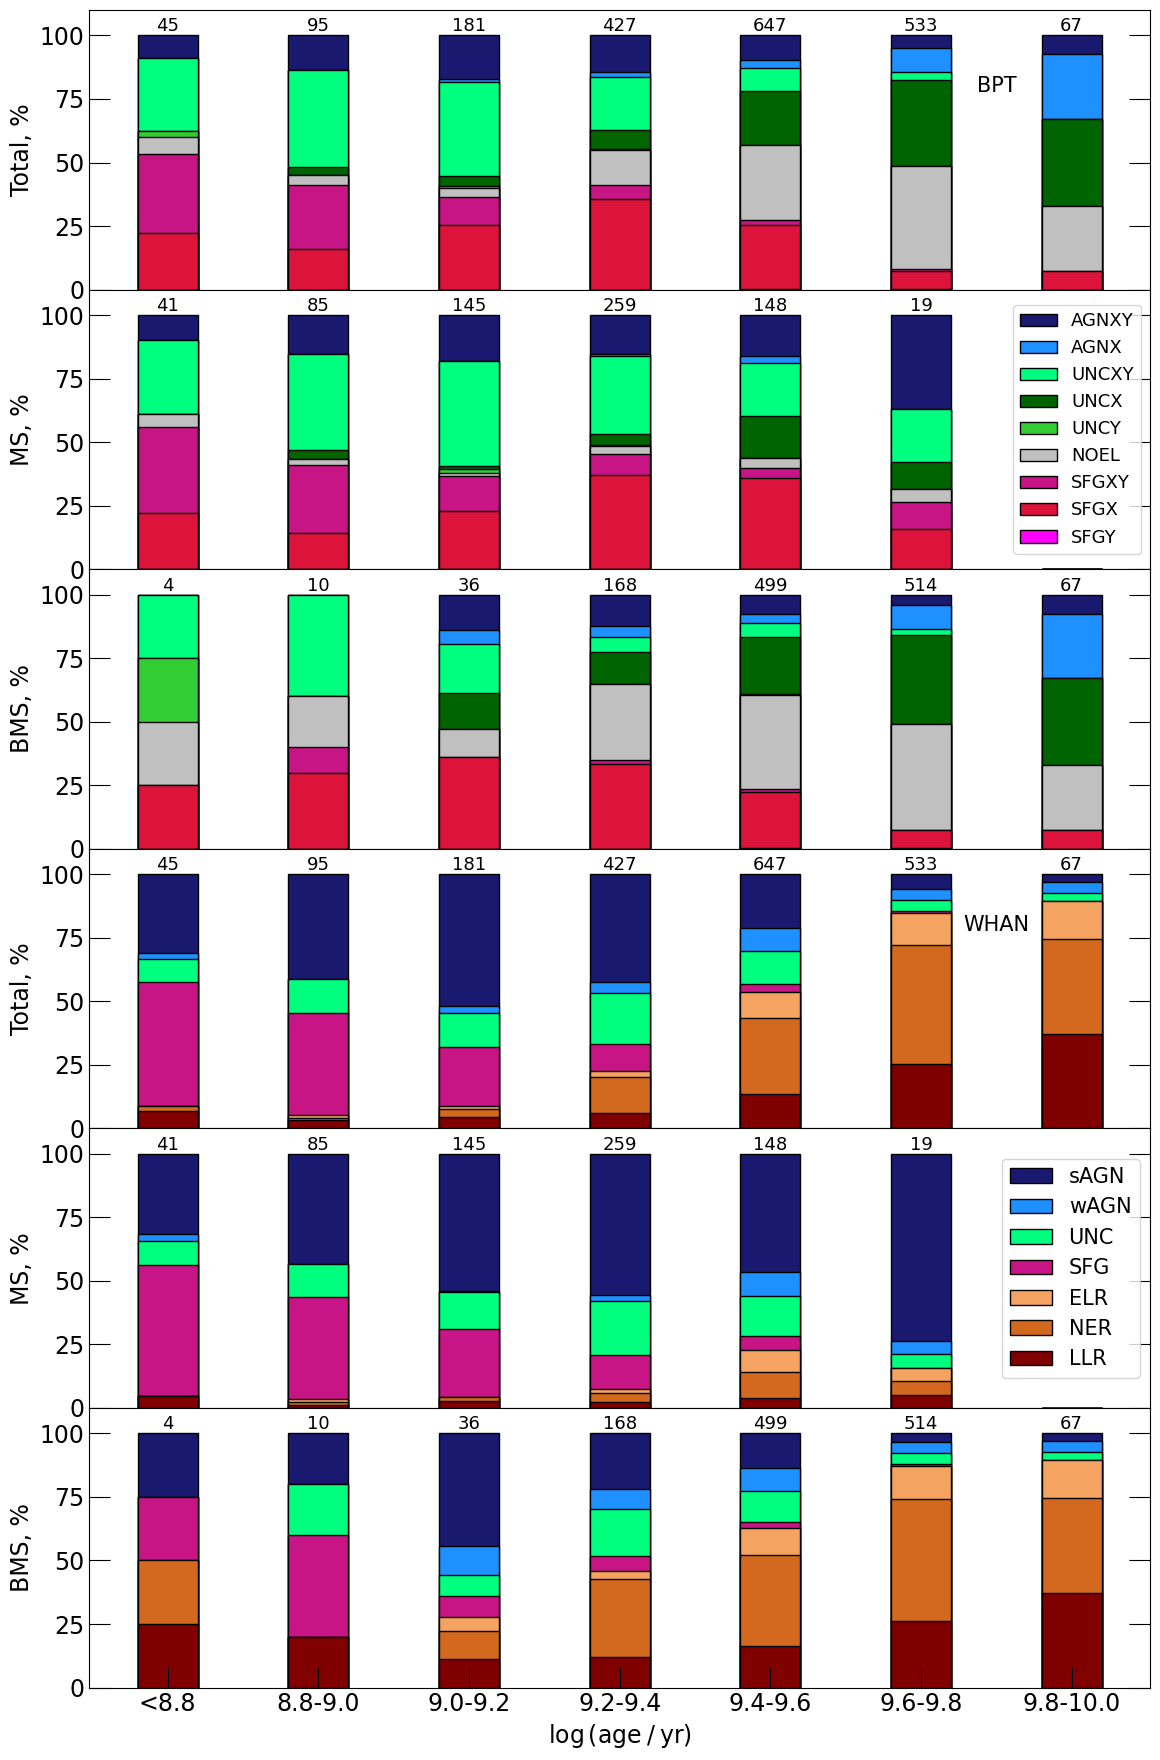

In [8]:
bin_stats({
    'input_path' : path,
    'x' : 'ager_percentile50',
    'xlabel' : r'$\log \mathrm{(age \: / \: yr)}$',
    'bins' : bids_age,
    'bins_names' : ['<8.8', '8.8-9.0', '9.0-9.2', '9.2-9.4', '9.4-9.6', '9.6-9.8', '9.8-10.0'],
    'save_path' : r'AGE_SNAPSHOTS.pdf'
}
)

e:\backup\backup_BPT\current\__plt__2.py:324: DtypeWarning: Columns (0,224,227,228,253,267,273,277,288,302,306,323,339,340,358,372,374,413,432,434,450,451,483,504,615,667,699,711,744,752,753,754,755,756,758,804,833,901,933,951,956,1013,1014,1020,1021) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(pars_dict['input_path'])


AGN [3, 5, 11, 26, 26, 17, 1] 89
AGNX [0, 2, 10, 15, 37, 24, 4] 92
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [7, 6, 10, 18, 15, 4, 2] 62
UNCX [1, 5, 19, 67, 120, 97, 29] 338
UNCY [1, 0, 0, 0, 1, 0, 0] 2
SFGXY [3, 1, 0, 4, 1, 2, 0] 11
SFGX [9, 8, 27, 48, 88, 32, 10] 222
SFGY [1, 0, 1, 0, 0, 1, 0] 3
NOEL [17, 13, 46, 101, 125, 120, 45] 467
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [42, 40, 124, 279, 413, 297, 91] 1286


AGN [5, 3, 13, 30, 42, 19, 2] 114
AGNX [0, 0, 1, 0, 3, 2, 0] 6
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [27, 29, 46, 68, 36, 12, 0] 218
UNCX [1, 1, 10, 12, 13, 5, 0] 42
UNCY [0, 0, 2, 1, 0, 0, 0] 3
SFGXY [36, 16, 15, 11, 5, 2, 1] 86
SFGX [25, 15, 34, 65, 48, 19, 0] 206
SFGY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [5, 3, 4, 4, 4, 2, 0] 22
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [99, 67, 125, 191, 151, 61, 3] 697


AGN [8, 8, 24, 56, 68, 36, 3] 203
AGNX [0, 2, 11, 15, 40, 26, 4] 98
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [34, 35, 56, 86, 51, 16, 2] 280
UNCX [2, 6, 29, 79, 133, 102, 29] 380
UNCY [1, 0, 2, 1, 1, 0, 0] 5
SFGXY [

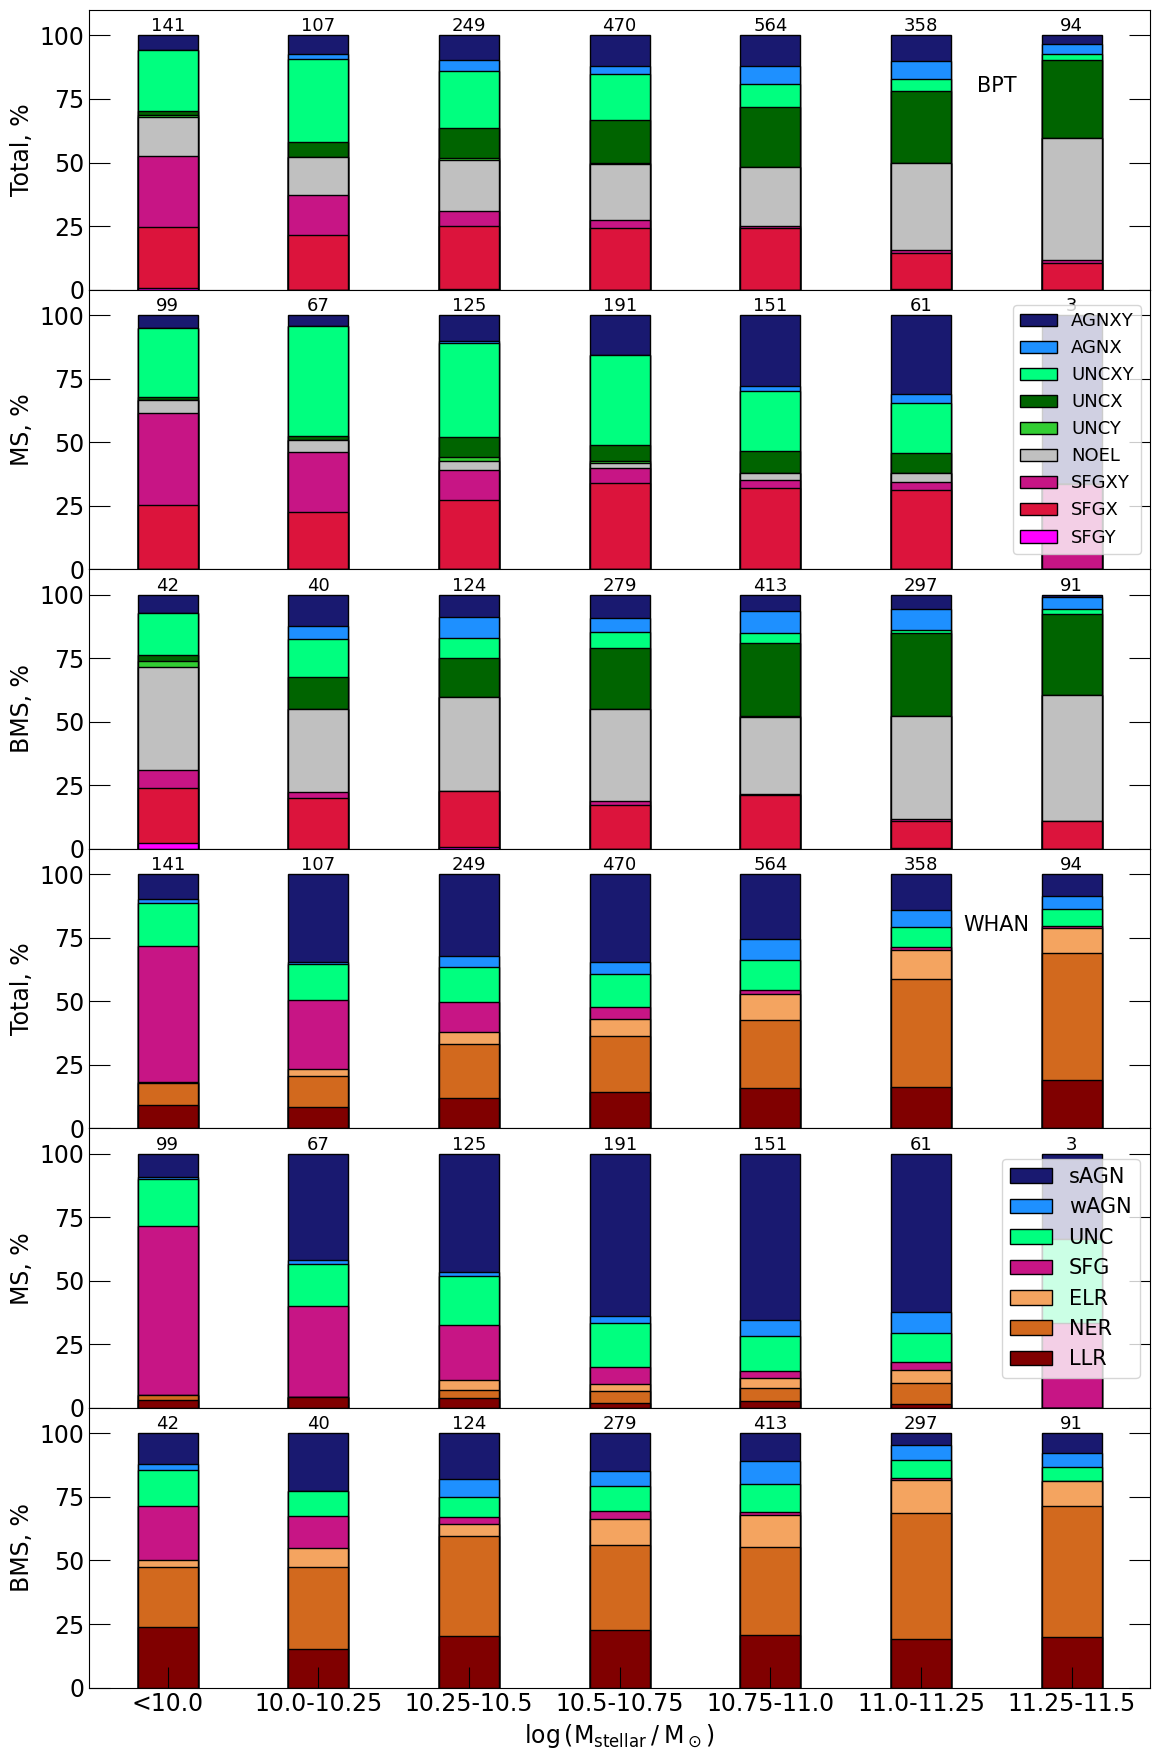

In [9]:
bin_stats({
    'input_path' : path,
    'x' : 'mass_stellar_percentile50',
    'xlabel' : r'$\log \mathrm{(M_{stellar} \: / \: M_\odot)}$',
    'bins' : bids_mass,
    'bins_names' : ['<10.0', '10.0-10.25', '10.25-10.5', '10.5-10.75', '10.75-11.0', '11.0-11.25', '11.25-11.5'],
    'save_path' : r'MASS_SNAPSHOTS.pdf'
}
)

e:\backup\backup_BPT\current\__plt__2.py:324: DtypeWarning: Columns (0,224,227,228,253,267,273,277,288,302,306,323,339,340,358,372,374,413,432,434,450,451,483,504,615,667,699,711,744,752,753,754,755,756,758,804,833,901,933,951,956,1013,1014,1020,1021) have mixed types. Specify dtype option on import or set low_memory=False.
  DataFrame = pd.read_csv(pars_dict['input_path'])


AGN [8, 17, 21, 19, 13, 8, 4] 90
AGNX [14, 29, 24, 10, 9, 4, 2] 92
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [5, 10, 13, 10, 9, 11, 4] 62
UNCX [9, 48, 77, 95, 44, 52, 16] 341
UNCY [0, 0, 0, 0, 1, 0, 1] 2
SFGXY [1, 3, 1, 4, 1, 1, 0] 11
SFGX [10, 18, 47, 52, 40, 45, 11] 223
SFGY [0, 0, 2, 1, 0, 0, 0] 3
NOEL [5, 13, 65, 98, 102, 142, 49] 474
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [52, 138, 250, 289, 219, 263, 87] 1298


AGN [1, 21, 20, 16, 24, 20, 12] 114
AGNX [1, 2, 3, 0, 0, 0, 0] 6
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [7, 28, 45, 32, 36, 50, 20] 218
UNCX [1, 8, 15, 5, 5, 8, 0] 42
UNCY [0, 0, 0, 1, 1, 0, 1] 3
SFGXY [10, 13, 15, 17, 13, 12, 6] 86
SFGX [2, 14, 46, 52, 32, 45, 15] 206
SFGY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [0, 1, 5, 3, 2, 9, 2] 22
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [22, 87, 149, 126, 113, 144, 56] 697


AGN [9, 38, 41, 35, 37, 28, 16] 204
AGNX [15, 31, 27, 10, 9, 4, 2] 98
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [12, 38, 58, 42, 45, 61, 24] 280
UNCX [10, 56, 92, 100, 49, 60, 16] 383
UNCY [0, 0, 0, 1, 2, 0, 2]

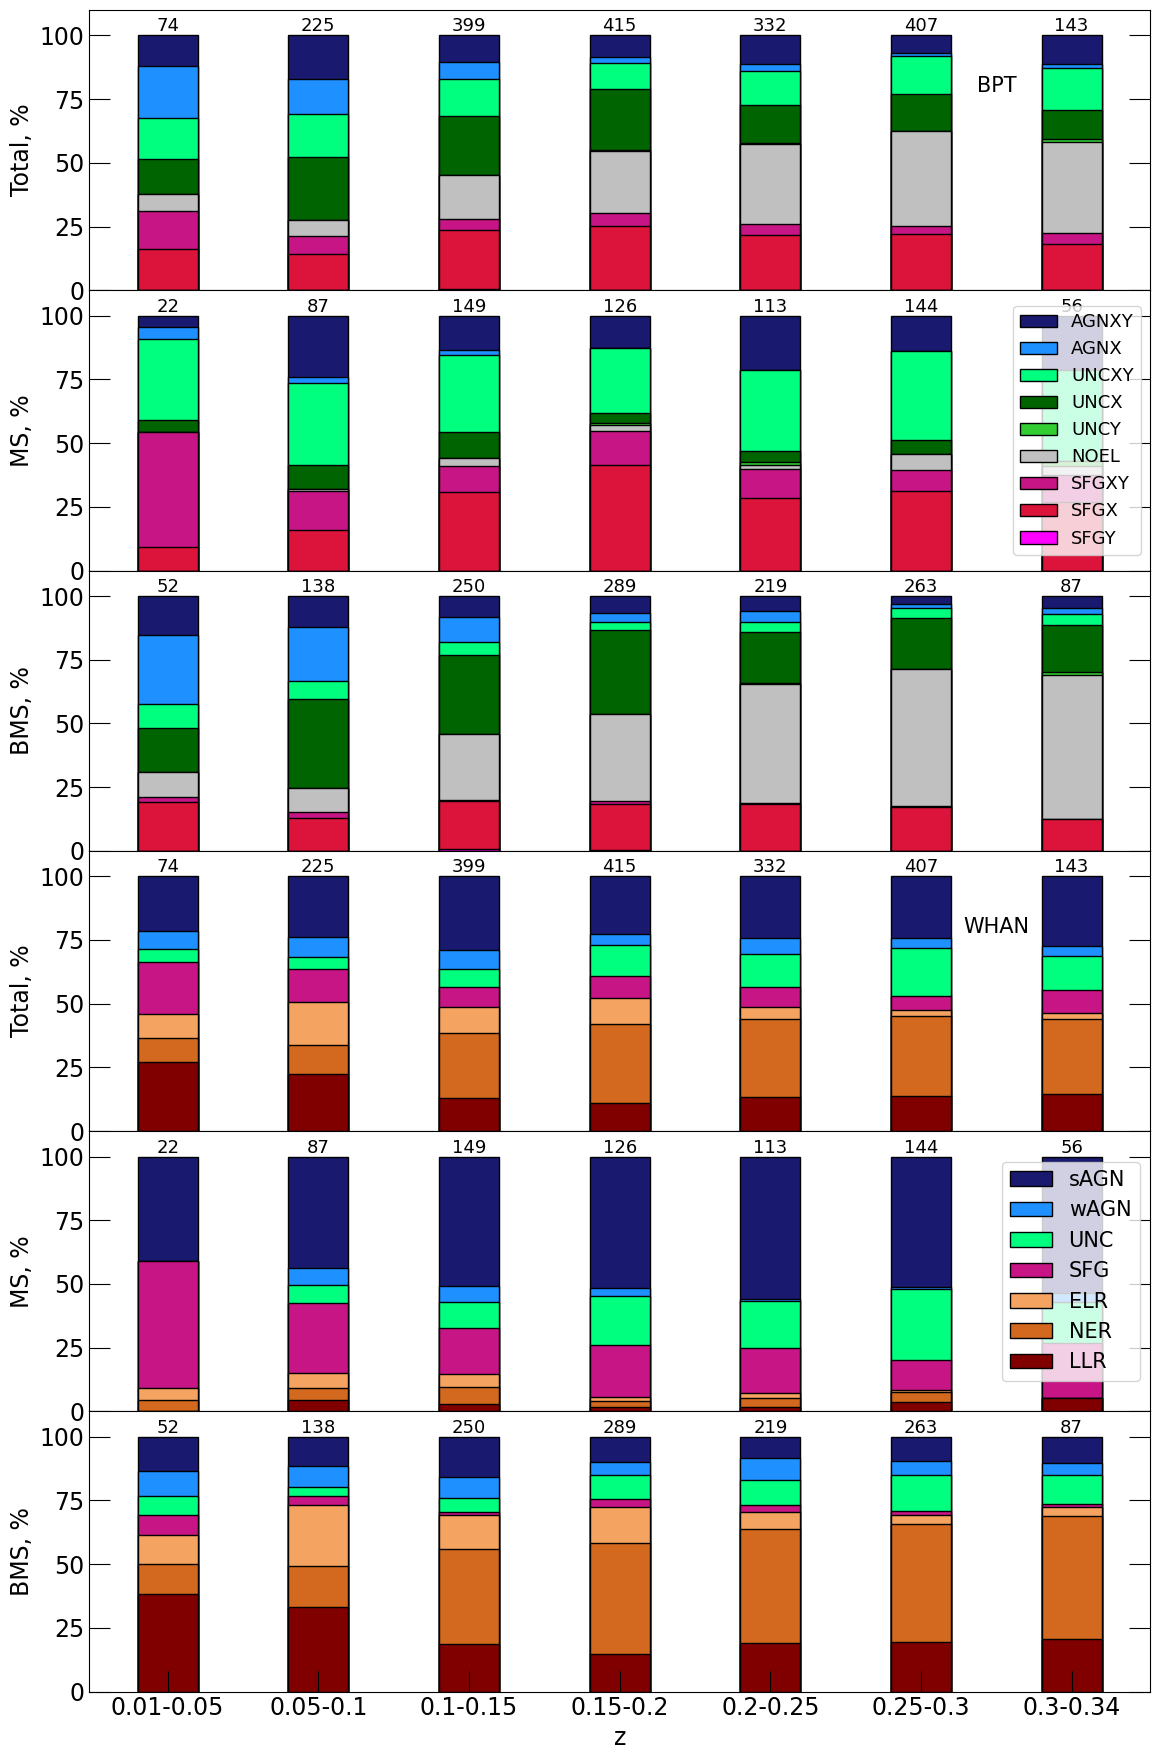

In [10]:
bin_stats({
    'input_path' : path,
    'x' : 'Z_1',
    'xlabel' : r'$\mathrm{z}$',
    'bins' : bids_z,
    'bins_names' : ['0.01-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3', '0.3-0.34'],
    'save_path' : r'RED_SNAPSHOTS.pdf'
}
)

e:\backup\backup_BPT\current\__plt__2.py:203: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axis.arrow(X_plot[i], Y_plot[i], 0, -0.3, head_width=0.01, head_length=0.1, width = 0.003, alpha = 1, color=item[4][0], edgecolor='black', facecolor='black')
C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_23348\3658244536.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('OIII.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)
C:\Users\ALEZHA_ACTIVE\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\ALEZHA_ACTIVE\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_l

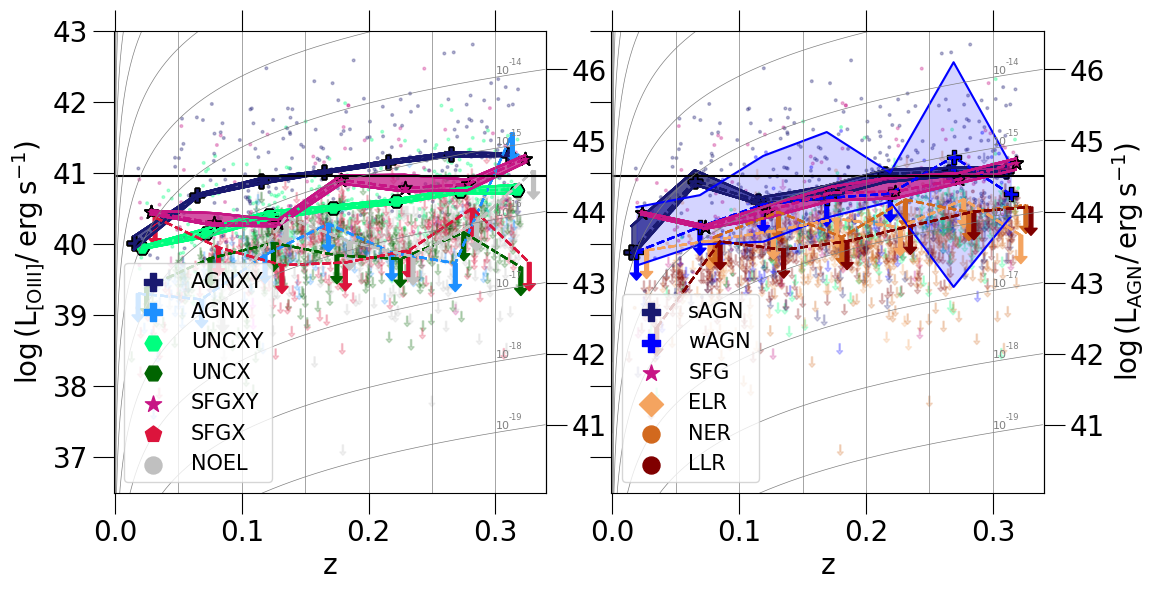

In [9]:
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM


def AGNtoOIII(x):
    return x - np.log10(3500)

def OIIItoAGN(x):
    return x + np.log10(3500)

def OIII_lum(flux, z):
    cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
    dist_Q = cosmo.luminosity_distance(z)
    distance = dist_Q.to(u.cm).value
    return np.log10(4 * np.pi * distance * distance * flux / ((1+z) * (10**(17))))

from outflows import *

gs_top = plt.GridSpec(1, 2, hspace=0.15, wspace=0.15)
fig = plt.figure(figsize=(12, 6), tight_layout=True)
adjusting_plotting_pars()
ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1])

db = MainDataFrame
db_up = db.query('LOIII_er < 0')
db_ok = db.query('LOIII_er > 0')

axes = [ax1, ax2]
secax1 = ax1.secondary_yaxis('right', functions=(OIIItoAGN, AGNtoOIII))
secax2 = ax2.secondary_yaxis('right', functions=(OIIItoAGN, AGNtoOIII))
secax2.set_ylabel(r'$\log \mathrm{(L_{AGN} / \: erg \: s^{-1})}$')

ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, left=True, direction='out', labelsize=20)
ax2.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, left=True, labelleft=False, direction='out', labelsize=20)

ax1.scatter(db_ok['Z_1'], db_ok['LOIII'], color=[color_dict_BPT[item][0] for item in db_ok['BPT']], s=15, alpha = 0.3, marker='.')
dp_up = db_up.reset_index(inplace=True, drop=True)
for i in range(len(db_up['Z_1'])):
    ax1.arrow(db_up['Z_1'][i], db_up['LOIII'][i], 0, -0.1, head_width=0.005, head_length=0.05, color=color_dict_BPT[db_up['BPT'][i]][0], alpha = 0.2)
    
ax2.scatter(db_ok['Z_1'], db_ok['LOIII'], color=[cd_WHAN[item][0] for item in db_ok['WHAN']], s=15, alpha=0.3, marker='.')
dp_up = db_up.reset_index(inplace=True, drop=True)
for i in range(len(db_up['Z_1'])):
    ax2.arrow(db_up['Z_1'][i], db_up['LOIII'][i], 0, -0.1, head_width=0.005, head_length=0.05, color=cd_WHAN[db_up['WHAN'][i]][0], alpha = 0.2)

LOIII_up = [0 if db['LOIII_er'][i] < 0 else np.log10((10**db['LOIII'][i]) + (10**db['LOIII_er'][i])) for i, item in enumerate(db['LOIII'])]
LOIII_down = [0 if db['LOIII_er'][i] < 0 else np.log10((10**db['LOIII'][i]) - (10**db['LOIII_er'][i])) for i, item in enumerate(db['LOIII'])]
ks = [0 if db['LOIII_er'][i] < 0 else 1 for i, item in enumerate(db['LOIII'])]

class_list_BPT = class_list_creator_w_err_out(db['Z_1'], db['LOIII'], LOIII_up, LOIII_down, db['BPT'], 'BPT', ks)
class_list_WHAN = class_list_creator_w_err_out(db['Z_1'], db['LOIII'], LOIII_up, LOIII_down, db['WHAN'], 'WHAN', ks)

classlist_plotter_uplim(axes[0], class_list_BPT, bids_z)
classlist_plotter_uplim(axes[1], class_list_WHAN, bids_z)

for ax in axes:
    ax.axhline(44.5 - np.log10(3500), color='black')
    z = np.arange(0.0001, 0.34, 0.001)
    a = np.arange(-2, 10, 1)
    b = np.arange(0, 0.35, 0.05)
    for item in a:
        ax.plot(z, OIII_lum(1, z) + item, color='grey', linewidth=0.5)
        if OIII_lum(1, 0.3) + item + 0.05 < 43:
            texts = -17 + item
            ax.text(0.3, OIII_lum(1, 0.3) + item + 0.05, '10', color='grey', fontsize=8)
            ax.text(0.31, OIII_lum(1, 0.31) + item + 0.15, f'{texts}', color='grey', fontsize=6)
    for item in b:
        ax.axvline(item, color='grey', linewidth=0.5)
    ax.set_xlabel(r'$\mathrm{z}$')
    ax.set_ylim(36.5, 43)
    ax.set_xlim(-0.001, 0.34)
    
    
ax1.set_ylabel(r'$\log \mathrm{(L_{[OIII]} / \: erg \: s^{-1})}$')

for j, item in enumerate(class_list_BPT):
    axes[0].scatter(-99, -99, alpha = 1, color=item[4][0], marker=item[4][1], s = 150, label=list_names_BPT_1[j])
axes[0].legend(loc=3, fontsize=15)

for j, item in enumerate(class_list_WHAN):
    axes[1].scatter(-99, -99, alpha = 1, color=item[4][0], marker=item[4][1], s = 150, label=list_names_WHAN[j])
axes[1].legend(loc=3, fontsize=15)

fig.savefig('OIII.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)

In [12]:
db = MainDataFrame
db_ok = db.query('LOIII_er > 0 & LOIII > 41')
print(db_ok.shape)

db_ok_AGN = db_ok.query("BPT == 'AGNXY'")
print(db_ok_AGN.shape)

(204, 22)
(127, 22)


[39.10117521596577, 40.366538609642475, 41.04545680407551, 41.728961880426844, 42.80606235025739]
[42.64524326031604, 43.91060665399275, 44.58952484842579, 45.27302992477712, 46.35013039460767]


C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_23348\2723800564.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('OIII.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)
C:\Users\ALEZHA_ACTIVE\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\ALEZHA_ACTIVE\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


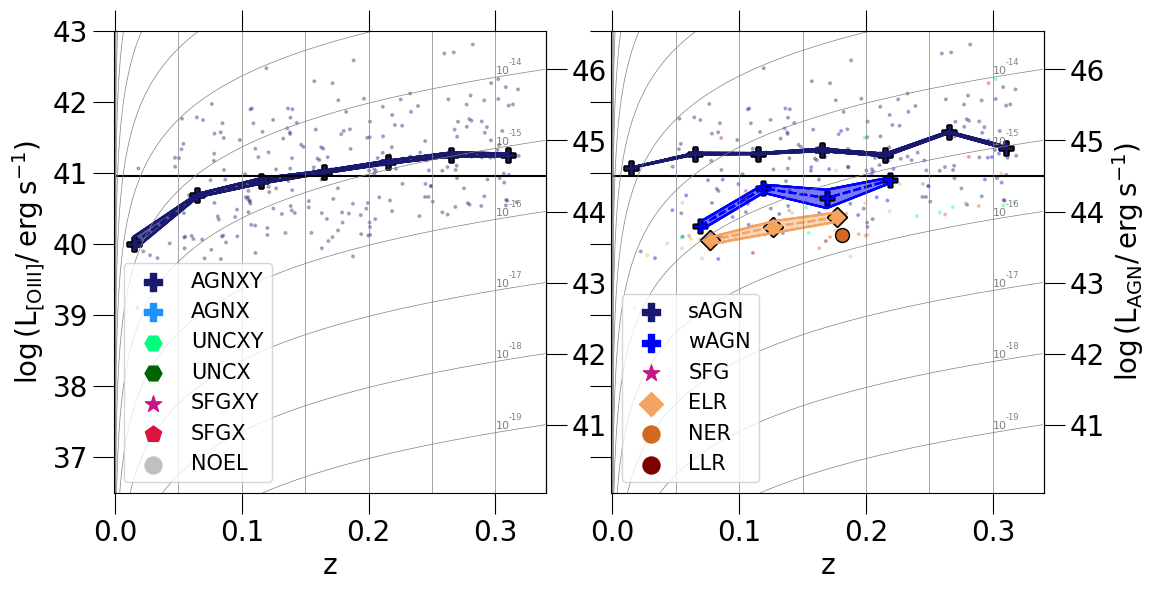

In [21]:
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM


def AGNtoOIII(x):
    return x - np.log10(3500)

def OIIItoAGN(x):
    return x + np.log10(3500)

def OIII_lum(flux, z):
    cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
    dist_Q = cosmo.luminosity_distance(z)
    distance = dist_Q.to(u.cm).value
    return np.log10(4 * np.pi * distance * distance * flux / ((1+z) * (10**(17))))

from outflows import *

gs_top = plt.GridSpec(1, 2, hspace=0.15, wspace=0.15)
fig = plt.figure(figsize=(12, 6), tight_layout=True)
adjusting_plotting_pars()
ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1])

db_init = MainDataFrame
db = db_init.query('LOIII_er > 0 & (BPT == "AGNXY")')
# db = db_init.query('LOIII_er > 0')
# db = db.reset_index(inplace=True, drop=True)
db_up = db.query('LOIII_er < 0')
db_ok = db.query('LOIII_er > 0')

dp = db.reset_index(inplace=True, drop=True)

values_OIII = [np.min(db['LOIII']), np.percentile(db['LOIII'], 16), np.percentile(db['LOIII'], 50), np.percentile(db['LOIII'], 84), np.max(db['LOIII'])]
values_AGN = [item + np.log10(3500) for item in values_OIII]

print(values_OIII)
print(values_AGN)

axes = [ax1, ax2]
secax1 = ax1.secondary_yaxis('right', functions=(OIIItoAGN, AGNtoOIII))
secax2 = ax2.secondary_yaxis('right', functions=(OIIItoAGN, AGNtoOIII))
secax2.set_ylabel(r'$\log \mathrm{(L_{AGN} / \: erg \: s^{-1})}$')

ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, left=True, direction='out', labelsize=20)
ax2.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, left=True, labelleft=False, direction='out', labelsize=20)

ax1.scatter(db_ok['Z_1'], db_ok['LOIII'], color=[color_dict_BPT[item][0] for item in db_ok['BPT']], s=15, alpha = 0.3, marker='.')
dp_up = db_up.reset_index(inplace=True, drop=True)
for i in range(len(db_up['Z_1'])):
    ax1.arrow(db_up['Z_1'][i], db_up['LOIII'][i], 0, -0.1, head_width=0.005, head_length=0.05, color=color_dict_BPT[db_up['BPT'][i]][0], alpha = 0.2)
    
ax2.scatter(db_ok['Z_1'], db_ok['LOIII'], color=[cd_WHAN[item][0] for item in db_ok['WHAN']], s=15, alpha=0.3, marker='.')
dp_up = db_up.reset_index(inplace=True, drop=True)
for i in range(len(db_up['Z_1'])):
    ax2.arrow(db_up['Z_1'][i], db_up['LOIII'][i], 0, -0.1, head_width=0.005, head_length=0.05, color=cd_WHAN[db_up['WHAN'][i]][0], alpha = 0.2)

LOIII_up = [0 if db['LOIII_er'][i] < 0 else np.log10((10**db['LOIII'][i]) + (10**db['LOIII_er'][i])) for i, item in enumerate(db['LOIII'])]
LOIII_down = [0 if db['LOIII_er'][i] < 0 else np.log10((10**db['LOIII'][i]) - (10**db['LOIII_er'][i])) for i, item in enumerate(db['LOIII'])]
ks = [0 if db['LOIII_er'][i] < 0 else 1 for i, item in enumerate(db['LOIII'])]

class_list_BPT = class_list_creator_w_err_out(db['Z_1'], db['LOIII'], LOIII_up, LOIII_down, db['BPT'], 'BPT', ks)
class_list_WHAN = class_list_creator_w_err_out(db['Z_1'], db['LOIII'], LOIII_up, LOIII_down, db['WHAN'], 'WHAN', ks)

classlist_plotter_uplim(axes[0], class_list_BPT, bids_z)
classlist_plotter_uplim(axes[1], class_list_WHAN, bids_z)

for ax in axes:
    ax.axhline(44.5 - np.log10(3500), color='black')
    z = np.arange(0.0001, 0.34, 0.001)
    a = np.arange(-2, 10, 1)
    b = np.arange(0, 0.35, 0.05)
    for item in a:
        ax.plot(z, OIII_lum(1, z) + item, color='grey', linewidth=0.5)
        if OIII_lum(1, 0.3) + item + 0.05 < 43:
            texts = -17 + item
            ax.text(0.3, OIII_lum(1, 0.3) + item + 0.05, '10', color='grey', fontsize=8)
            ax.text(0.31, OIII_lum(1, 0.31) + item + 0.15, f'{texts}', color='grey', fontsize=6)
    for item in b:
        ax.axvline(item, color='grey', linewidth=0.5)
    ax.set_xlabel(r'$\mathrm{z}$')
    ax.set_ylim(36.5, 43)
    ax.set_xlim(-0.001, 0.34)
    
    
ax1.set_ylabel(r'$\log \mathrm{(L_{[OIII]} / \: erg \: s^{-1})}$')

for j, item in enumerate(class_list_BPT):
    axes[0].scatter(-99, -99, alpha = 1, color=item[4][0], marker=item[4][1], s = 150, label=list_names_BPT_1[j])
axes[0].legend(loc=3, fontsize=15)

for j, item in enumerate(class_list_WHAN):
    axes[1].scatter(-99, -99, alpha = 1, color=item[4][0], marker=item[4][1], s = 150, label=list_names_WHAN[j])
axes[1].legend(loc=3, fontsize=15)

fig.savefig('OIII.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)